In [55]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import special
import io
import base64

In [56]:
def sharlie(n):
    return special.erfinv((n - 1) / n) * np.sqrt(2)

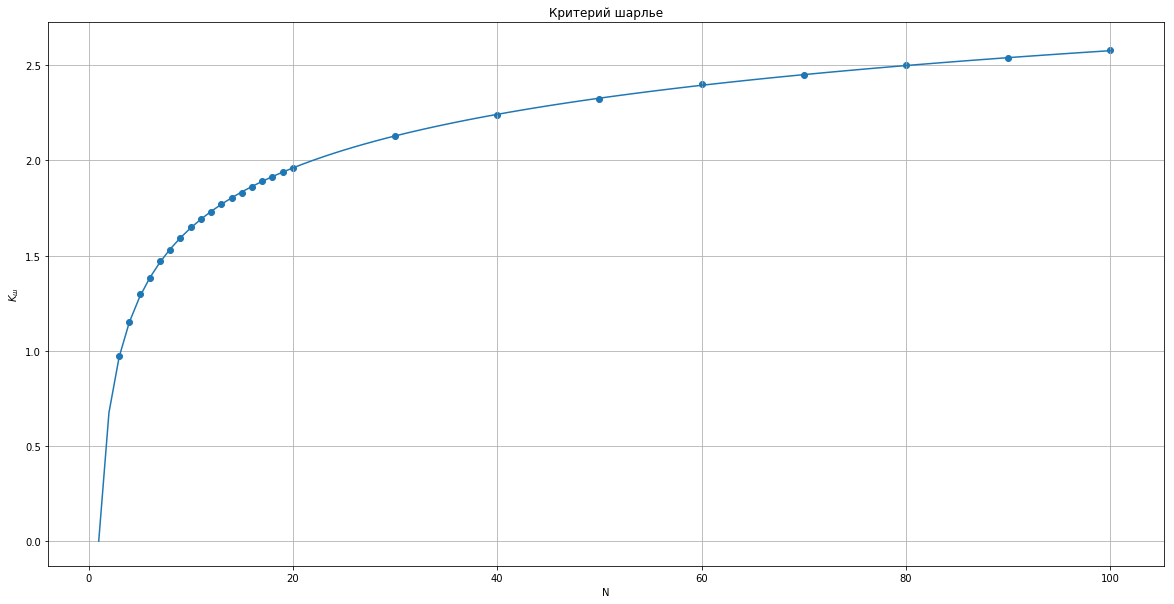

In [57]:
plt.figure(figsize=(20,10))
_x = np.arange(1, 101, 1)
n = [3,4, 5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19, 20, 30, 40, 50, 60, 70, 80 ,90, 100]
K = [0.97, 1.15, 1.3, 1.38,1.47, 1.53,1.59,1.65,1.69,1.73,1.77,1.8,1.83,1.86,1.89,1.91,1.94,1.96,2.13,2.24,2.32,2.40,2.45,2.50,2.54,2.58]
plt.grid(True)
plt.title('Критерий шарлье')
plt.xlabel('N')
plt.ylabel('$K_ш$')
plt.plot(_x, sharlie(_x))
plt.scatter(n, K)
plt.show()

In [67]:
def statistics(x):
    '''return mean, sample std'''
    return x.mean(), np.sqrt(np.sum((x - x.mean()) ** 2) / (len(x) - 1))

In [68]:
def metric(x):
    '''return normalized deviation'''
    mean, sko = statistics(x)
    return np.abs(x - mean) / sko

In [59]:
def borders(x):
    '''return borders for good values'''
    sh = sharlie(len(x))
    s = np.sqrt(np.sum((x - x.mean()) ** 2) / (len(x) - 1))
    m = x.mean()
    return m - sh * s, m + sh * s

In [60]:
def find_bad(x):
    '''return good and bad values in dataset'''
    test = metric(x)
    mask = test > sharlie(len(x))
    bad = x[mask]
    x = x[~mask]
    return x, bad  

In [61]:
def plt_to_base64(p):
    '''convert plot to base64 image'''
    b = io.BytesIO()
    plt.savefig(b, format="png")
    b.seek(0)
    return base64.b64encode(b.read())

In [62]:
def plt_grapg(ax, X, ok, bad):
    '''draw plot graph'''
    border = borders(ok)
    iterator_ok = np.arange(len(X))[np.isin(X, ok)]
    iterator_bad = np.arange(len(X))[np.isin(X, bad)]
    ax.grid(True)
    ax.set_title("Обработка выборки")
    ax.xlabel = "#"
    ax.ylabel = "Значение"
    ax.hlines(border, 0, len(X) - 1, color="r", linestyles="dashed")
    ax.scatter(iterator_ok, ok, label="Хорошие значения")
    ax.scatter(iterator_bad, bad, label="Промахи")
    ax.legend()
    return ax

In [71]:
def calc(filename):
    history = []
    X = []
    with open(filename, "r") as f:
        for i in f:
            X.append(float(i.replace(",", ".")))
    X = np.array(X)
    bad = [0]  # do-while loop
    iteration = 0
    fig = plt.figure(figsize=(20, 20))
    ok = X.copy()
    while len(bad) != 0:
        iteration += 1
        ax = fig.add_subplot(3, 3, iteration)
        mean, sko = statistics(ok)
        sh = sharlie(len(ok))
        ok, bad = find_bad(ok)
        ax = plt_grapg(ax, X, ok, bad)
        history.append({"ok": ok, "bad": bad, "plot": plt_to_base64(ax), "mean": mean, "sko": sko, "sharlie": sh})
    plt.show()
    return history

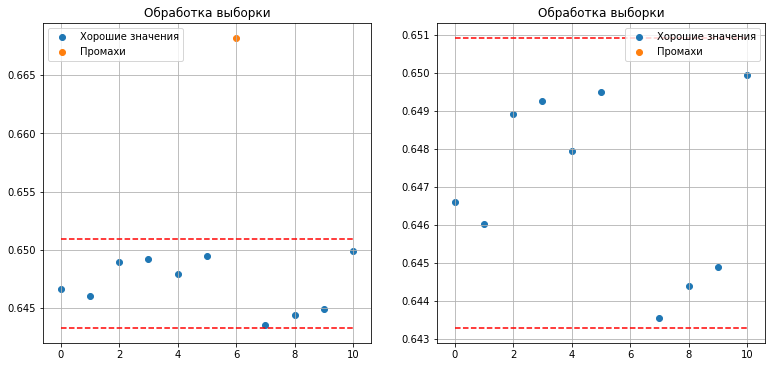

In [72]:
r = calc("data/Chrl_v06_a.txt")

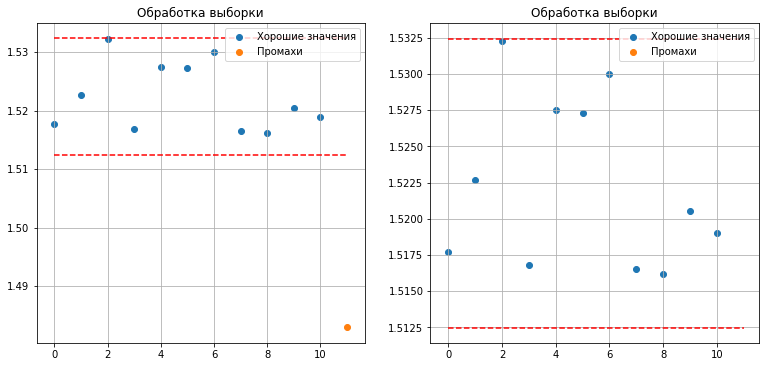

In [73]:
r = calc('data/Chrl_v06_b.txt')

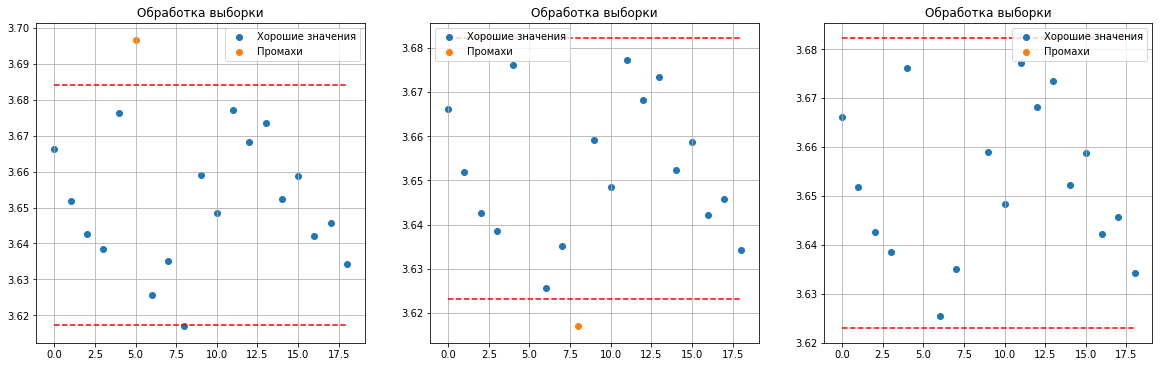

In [74]:
r = calc('data/Chrl_v06_c.txt')